<a href="https://colab.research.google.com/github/MassGH2023/Supervised-Machine-Learning-Classification/blob/main/SVC_Wine_Quality_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVC



*   Maximize the margin: SVM places the boundary as far as possible from the closest points of each class (support vectors).
*   Can handle non-linear data: Uses a trick called kernel to map data into higher dimensions for better separation.
*    SVM is robust to outliers.





# Support Vector Machine Terminology



1.   Hyperplane: The hyperplane is the decision boundary used to separate data points of different classes in a feature space. For linear classification, this is a linear equation represented as wx+b=0.
2.   Support Vectors: **Support vectors are the closest data points to the hyperplane**. These points are critical in determining the hyperplane and the margin in Support Vector Machine (SVM).
3.   Margin: The margin refers to **the distance between the support vector and the hyperplane**. *The primary goal of the SVM algorithm is to maximize this margin*, as a wider margin typically results in better classification performance.
4.   Kernel: The kernel is a mathematical function used in SVM to map input data into a **higher-dimensional feature space**. This allows the SVM to find a hyperplane in cases where data points are not linearly separable in the original space. Common kernel functions include *linear, polynomial, radial basis function (RBF), and sigmoid*.
5.   Hard Margin: A hard margin refers to the maximum-margin hyperplane that perfectly separates the data points of different classes without any misclassifications.
6.   Soft Margin: When data contains outliers or is not perfectly separable, SVM uses the soft margin technique. This method introduces a slack variable for each data point to allow some misclassifications while balancing between maximizing the margin and minimizing violations.
7.   C: The C parameter in SVM is a regularization term that balances margin maximization and the penalty for misclassifications. A higher C value imposes a stricter penalty for margin violations, leading to **a smaller margin but fewer misclassifications**.
8.   Hinge Loss: The hinge loss is a common loss function in SVMs. It penalizes misclassified points or margin violations and is often combined with a regularization term in the objective function.
9.   Dual Problem: The dual problem in SVM involves solving for the Lagrange multipliers associated with the support vectors. This formulation allows for the use of the kernel trick and facilitates more efficient computation.









In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep=',')

In [3]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


I use SVM to investigate Wine Quality data. so the target property would be the `quality` column.

In [5]:
df = pd.get_dummies(data,  drop_first=True)
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color_white  
0      9.4        5        False  
1      9.8        5        False  
2      9.8        5        False  
3      9.8        6        False  
4      9.4        5        False

In [6]:
df = df.rename(columns = {"color_white": "color"})

In [7]:
y = df['color']
X = df.drop(columns= ['color'])

X.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
X.shape, y.shape

((6497, 12), (6497,))

In [9]:
fields = X.columns
corrs = df[fields].corrwith(y).sort_values()
corrs = pd.DataFrame(corrs).reset_index().rename(columns = {'index': 'feature', 0: "correlation_value"})
corrs

feature  correlation_value
0       volatile_acidity          -0.653036
1              chlorides          -0.512678
2              sulphates          -0.487218
3          fixed_acidity          -0.486740
4                density          -0.390645
5                     pH          -0.329129
6                alcohol           0.032970
7                quality           0.119323
8            citric_acid           0.187397
9         residual_sugar           0.348821
10   free_sulfur_dioxide           0.471644
11  total_sulfur_dioxide           0.700357

In [10]:
colors = sns.color_palette("Paired")
colors

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [11]:
plt.style.use('ggplot')

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

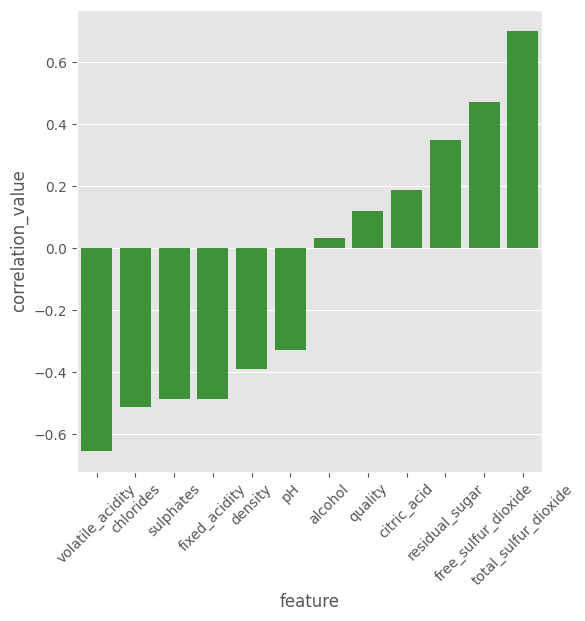

In [13]:
f, a = plt.subplots(figsize = (6,6))
sns.barplot(x = corrs['feature'], y = corrs['correlation_value'], color = colors[3])
plt.xticks(rotation = 45);

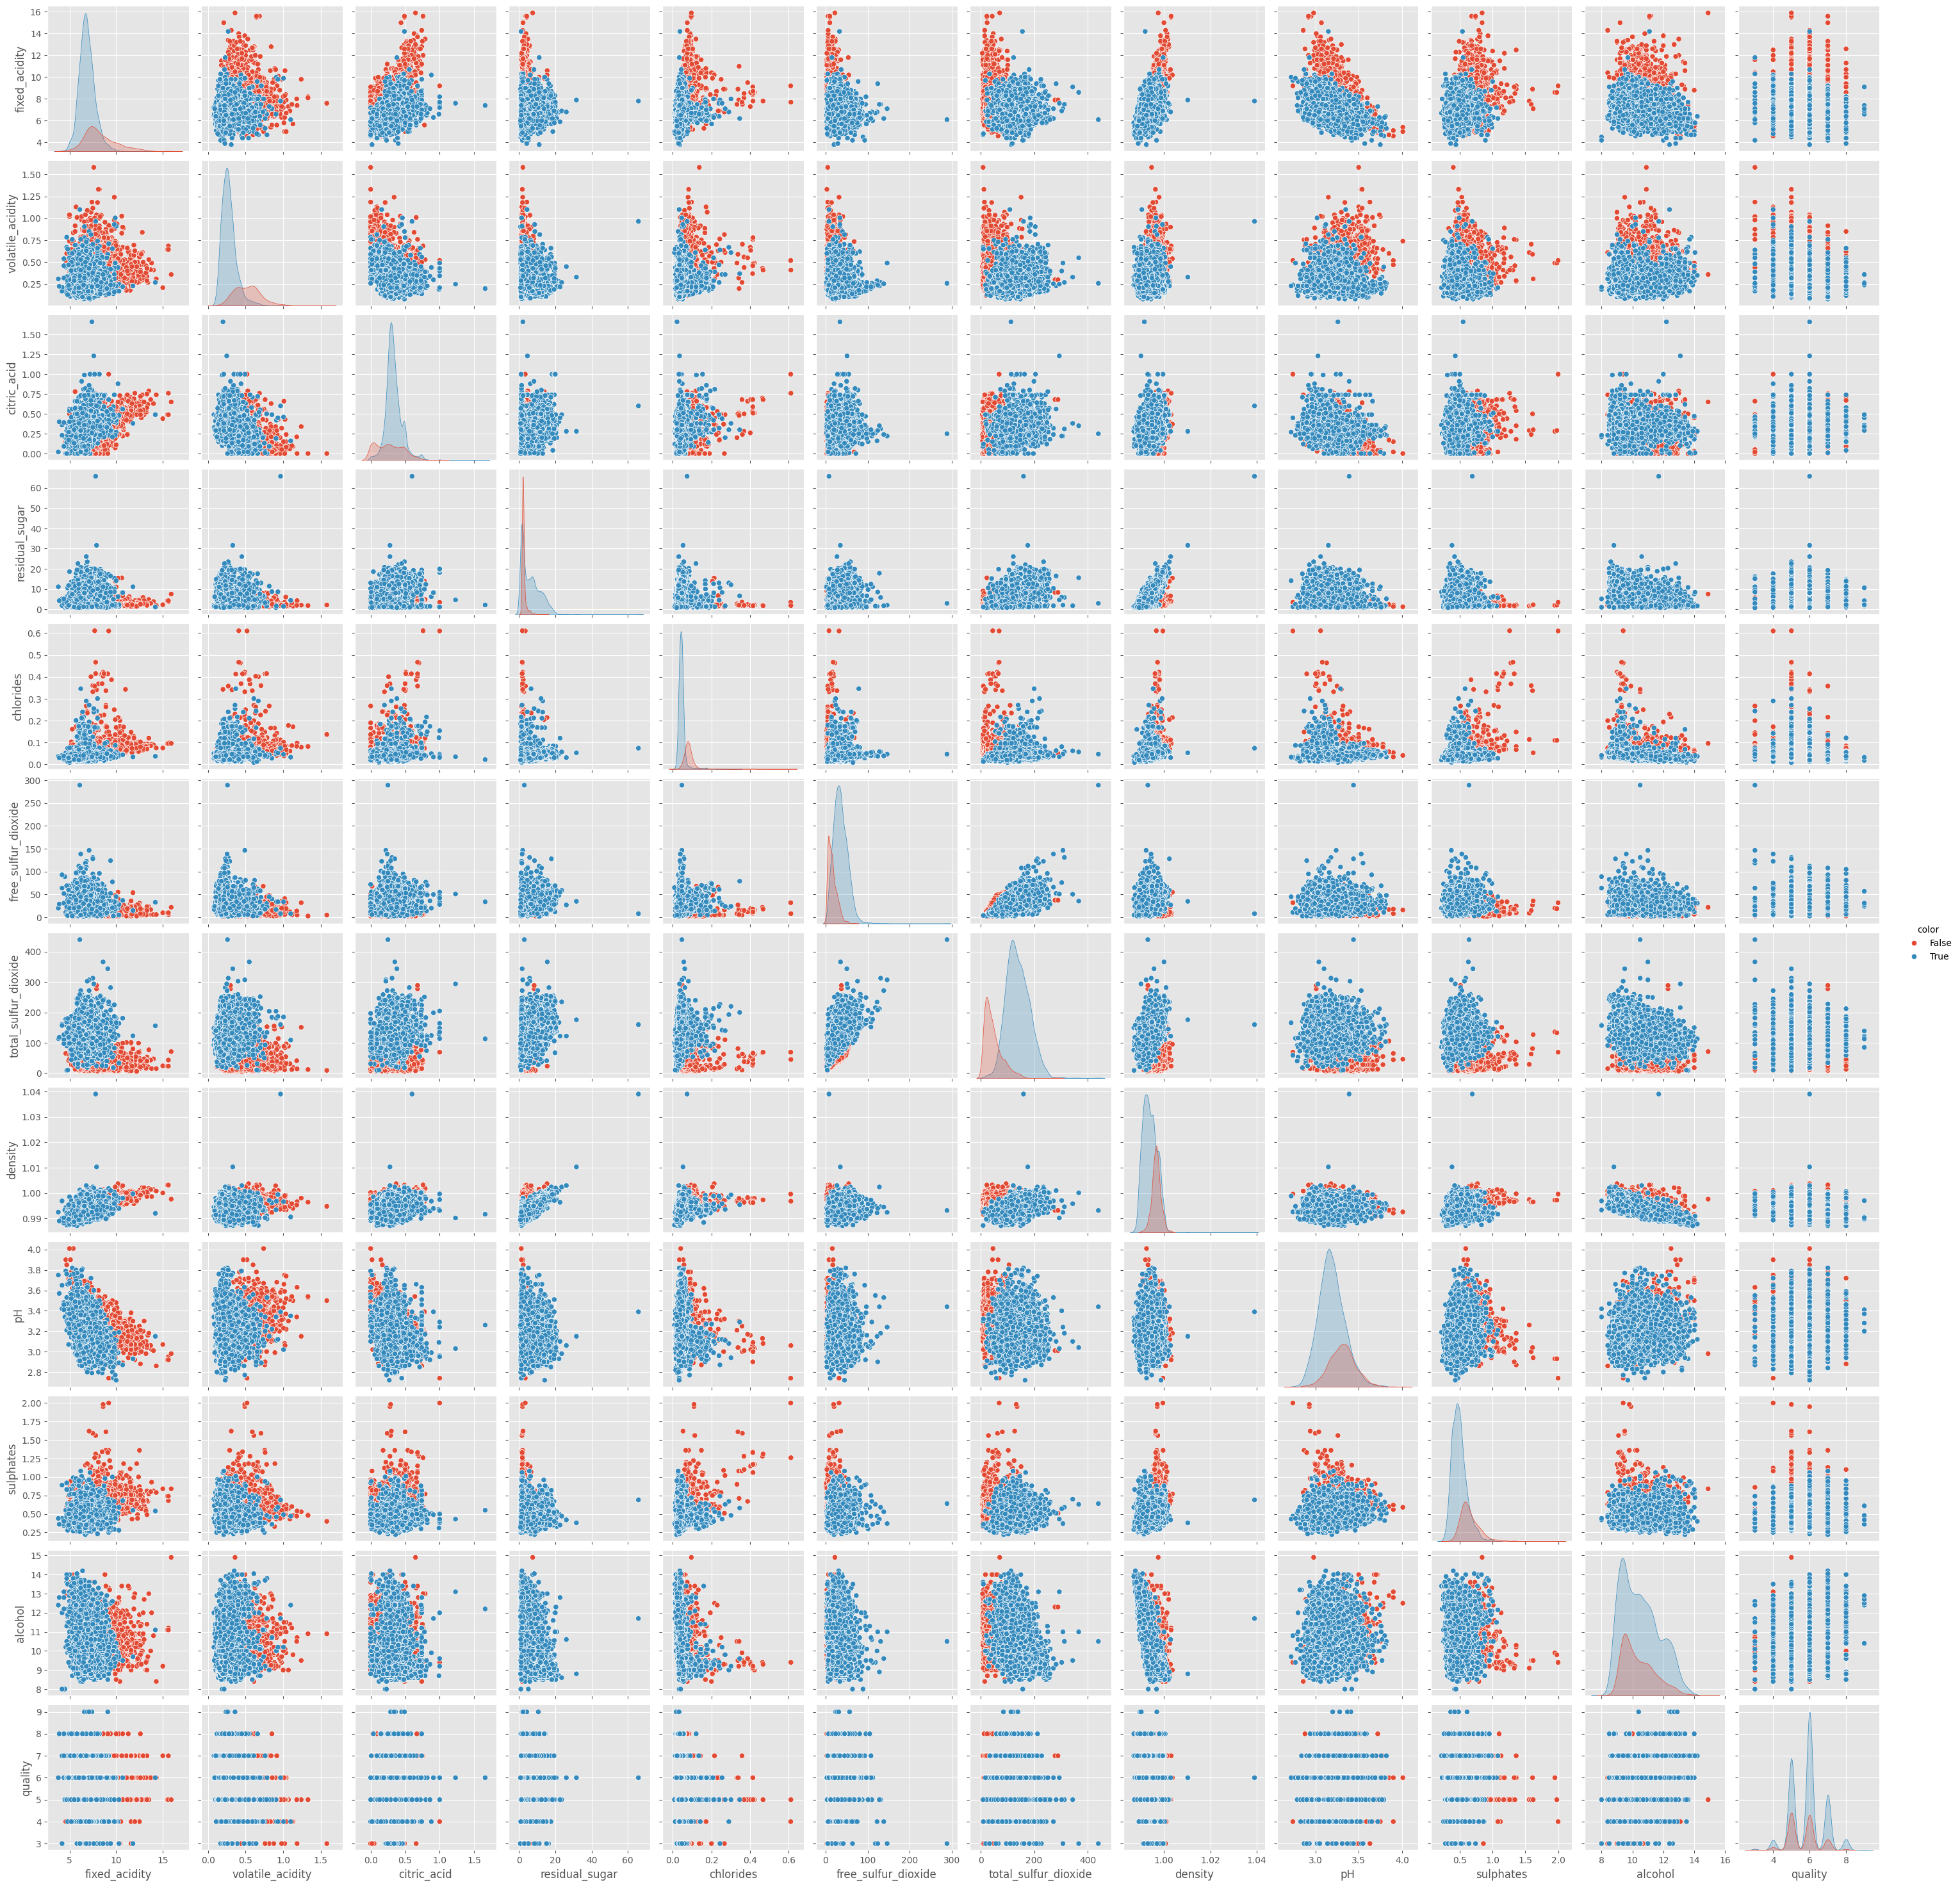

In [14]:
sns.pairplot(df, hue = 'color')

In [15]:
corrs.sort_values(by= "correlation_value", key = abs,ascending = False)['feature'].iloc[:2].values

array(['total_sulfur_dioxide', 'volatile_acidity'], dtype=object)

In [16]:
from sklearn.preprocessing import MinMaxScaler



newfield = corrs.sort_values(by= "correlation_value", key = abs,ascending = False)['feature'].iloc[:2].values
Xnew = df[newfield]
scaler = MinMaxScaler()

X = scaler.fit_transform(Xnew)

X = pd.DataFrame(X, columns = ["%s_scaled" % f for f in newfield])
X

total_sulfur_dioxide_scaled  volatile_acidity_scaled
0                        0.064516                 0.413333
1                        0.140553                 0.533333
2                        0.110599                 0.453333
3                        0.124424                 0.133333
4                        0.064516                 0.413333
...                           ...                      ...
6492                     0.198157                 0.086667
6493                     0.373272                 0.160000
6494                     0.241935                 0.106667
6495                     0.239631                 0.140000
6496                     0.211982                 0.086667

[6497 rows x 2 columns]

In [18]:
X

total_sulfur_dioxide_scaled  volatile_acidity_scaled
0                        0.064516                 0.413333
1                        0.140553                 0.533333
2                        0.110599                 0.453333
3                        0.124424                 0.133333
4                        0.064516                 0.413333
...                           ...                      ...
6492                     0.198157                 0.086667
6493                     0.373272                 0.160000
6494                     0.241935                 0.106667
6495                     0.239631                 0.140000
6496                     0.211982                 0.086667

[6497 rows x 2 columns]